# Demonstration simulation, Section 3 

## this ipynb file produces the graphical and numerical results for demonstration simulation in section 3

---

# Check the following before running the code

## (a) Read "Read_Me_First.pdf" first, which introduces the package

## (b) Delete all .p files in the folder of this ipynb file. The .p files record the numerical results of the last computation.

## (c) To avoid confusion, reset your kernel before you running the notebook (to clear memory): Menu "Kernel" $\rightarrow$ "Restart Kernel and clear all outputs".

## (d) To evaluate the code for simulation replication,
## * click : Menu "Run" $\rightarrow$ "Run all cells"
## * or, select a cell of code, press "shift" and "enter". Run all cells to avoid errors

## (e) Check "scikit-learn", "numpy", "matplotlib" and "tqdm" are installed. If not,
## * run "pip install scikit-learn numpy matplotlib tqdm" in terminal (Mac OS or Linux) or command prompt as administrator (Windows) if you use Python3 without any IDE.
## * we highly recommend installing Anaconda3 version 19.03 directly to avoid unecessary package management (all packages mentioned above are installed by default).

---

## #1: import all modules

* For simplicity and elegancy, all relevant functions and classes are coded in "solar_simul_one_shot.py". See "solar_simul_one_shot.py" for the details.

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from solar_simul_one_shot import one_shot_simul

---

## #2: define inputs values

Considering the population regression equation $Y = X \overline{\beta} + e$, where $\overline{\beta} = \left[2, 3, 4, 5, 6, 0, \ldots, 0 \right]$ in our paper

* sample_size is the sample size $n$ in the paper;
* n_dim       is the total number of variables(informative + redundant) in $X$, $p$ in the paper;
* n_info      is the number of informative variables in $X$;
* n_repeat    is the number of subsamples generated by solar;
* num_rep     is the number of repeatation for solar, cv-lars and cv-cd
* step_size   is the step size for tuning $c$;
* rnd_seed    is the random seed value;

### To change the simulation settings, simply change the input values
### Note that if you change n_info you will have to adjust the DGP as follows:

* If $i > \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\overline{\beta}_i = 0$
* If $i \leqslant \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\overline{\beta}_i = i + 2$

In [2]:
sample_size = 200
n_dim       = 100
n_info      = 5
n_iter      = 10
n_repeat    = 10
step_size   = -0.02
rnd_seed    = 0

---

## #4: compute solar, CV-lars-lasso and CV-cd

### Numpy, sklearn and python are actively updated. If you use different version, replication results may be slightly different from the paper (see Read_me_first.pdf for detail).

### first, we call the class for simulation from "solar_simul_one_shot.py"

In [3]:
#control the random seed for reproduction
np.random.seed(rnd_seed)

trial = one_shot_simul(sample_size, n_dim, n_info, n_repeat,  step_size, rnd_seed)

### then we compute cv-lars-lasso, cv-cd and solar on the simulated data and return the result

In [4]:
solar_coef, opt_c, test_error, Qc_list, la_list, la_vari_list, cd_list, cd_vari_list = trial.simul_func()

---

## #4: plots and results of the simulation

### first, we plot the result of tuning $c$ in algorithm 3

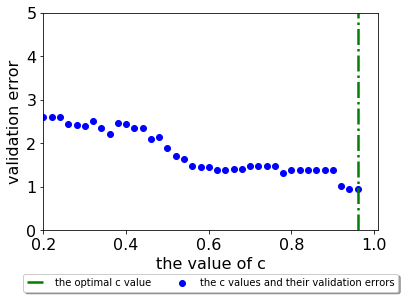

In [5]:
trial.q_plot(test_error, opt_c)

###  then we report the $Q(c) = \left\{ \mathbf{x}_j \; \vert \; \widehat{q}_j \geqslant c \right\}$ under different value of $c$.

In [6]:
trial.q_list(Qc_list)

q_hat value >=  1.0
[['X4']]
q_hat value >=  0.9777777777777777
[['X4'], ['X3', 'X2']]
q_hat value >=  0.9555555555555556
[['X4'], ['X3', 'X2'], ['X1', 'X0']]
q_hat value >=  0.9111111111111111
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19']]
q_hat value >=  0.8888888888888888
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19'], ['X68', 'X40', 'X18']]
q_hat value >=  0.7555555555555555
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19'], ['X68', 'X40', 'X18'], ['X91', 'X71']]
q_hat value >=  0.7333333333333333
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19'], ['X68', 'X40', 'X18'], ['X91', 'X71'], ['X70', 'X37']]
q_hat value >=  0.6888888888888889
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19'], ['X68', 'X40', 'X18'], ['X91', 'X71'], ['X70', 'X37'], ['X72']]
q_hat value >=  0.6666666666666666
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19'], ['X68', 'X40', 'X18'], ['X91', 'X71'], ['X70', 'X37'], ['X72'], ['X94']]
q_hat value >=  0.6444444444444445
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19'], ['X68', 'X40', 'X18'

### then we report solar regression coefficents

In [7]:
print(solar_coef)

[[1.90590232]
 [2.92660102]
 [3.94706396]
 [5.06522281]
 [6.12764936]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

### report $c^*$ of solar
### the reason we print max(opt_c) is because sometimes multiple values of $c$ is assigned with the same value of validation error

In [8]:
print(max(opt_c))

0.96


### and the number of variables selected by cv-lars-lasso

In [9]:
print(la_list)

14


### and the number of variables selected by cv-cd

In [10]:
print(cd_list)

17


### and variables selected by cv-lars-lasso

In [11]:
print('variables selected by cv-lars-lasso: ', [ 'X' + str(i) for i in la_vari_list])

variables selected by cv-lars-lasso:  ['X4', 'X3', 'X2', 'X1', 'X0', 'X71', 'X91', 'X90', 'X17', 'X40', 'X70', 'X65', 'X94', 'X28']


### and variables selected by cv-cd

In [12]:
print('variables selected by cv-cd: ', [ 'X' + str(i) for i in cd_vari_list])

variables selected by cv-cd:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X17', 'X19', 'X28', 'X31', 'X40', 'X41', 'X65', 'X70', 'X71', 'X90', 'X91', 'X94']
